In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
test = pd.read_csv('/Users/olgakadocnikova/Downloads/house-prices-advanced-regression-techniques (1)/test.csv', index_col=0) 

In [6]:
train = pd.read_csv('/Users/olgakadocnikova/Downloads/house-prices-advanced-regression-techniques (1)/train.csv', index_col=0) 

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [33]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


In [90]:
TARGETS = ['SalePrice', 'SalePriceLog']

In [50]:
np.nan_to_num(train['GarageFinish'].values[48])

0.0

In [40]:
for c in train.columns:
    uniq = np.unique([str(x) for x in train[c].values])
    print(c, len(uniq), uniq[:5])

MSSubClass 15 ['120' '160' '180' '190' '20']
MSZoning 5 ['C (all)' 'FV' 'RH' 'RL' 'RM']
LotFrontage 111 ['100.0' '101.0' '102.0' '103.0' '104.0']
LotArea 1073 ['10000' '10004' '10005' '10007' '10010']
Street 2 ['Grvl' 'Pave']
Alley 3 ['Grvl' 'Pave' 'nan']
LotShape 4 ['IR1' 'IR2' 'IR3' 'Reg']
LandContour 4 ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities 2 ['AllPub' 'NoSeWa']
LotConfig 5 ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr']
Condition1 9 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN']
Condition2 8 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN']
BldgType 5 ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle 8 ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf']
OverallQual 10 ['1' '10' '2' '3' '4']
OverallCond 9 ['1' '2' '3' '4' '5']
YearBuilt 112 ['1872' '1875' '1880' '1882' '1885']
YearRemodAdd 61 ['1950' '1951' '1952' '1953' '1954']
RoofStyle 6 ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard']
RoofMatl 8 ['ClyTile' 'CompS

In [56]:
def is_float(x):
    try:
        y = float(x)
        return True
    except:
        return False

def is_categ_col(df, col_name, uniq_bound=19):
    val = df[col_name].values
    val = [np.nan_to_num(x) for x in val]
    has_any_str = np.max([not is_float(x) for x in val])
    if has_any_str:
        return True
    if len(np.unique(val)) < uniq_bound:
        return True
    return False

In [58]:
col_types = {}

for c in train.columns:
    col_types[c] = is_categ_col(train, c)
    print(c, col_types[c])

MSSubClass True
MSZoning True
LotFrontage False
LotArea False
Street True
Alley True
LotShape True
LandContour True
Utilities True
LotConfig True
LandSlope True
Neighborhood True
Condition1 True
Condition2 True
BldgType True
HouseStyle True
OverallQual True
OverallCond True
YearBuilt False
YearRemodAdd False
RoofStyle True
RoofMatl True
Exterior1st True
Exterior2nd True
MasVnrType True
MasVnrArea False
ExterQual True
ExterCond True
Foundation True
BsmtQual True
BsmtCond True
BsmtExposure True
BsmtFinType1 True
BsmtFinSF1 False
BsmtFinType2 True
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
Heating True
HeatingQC True
CentralAir True
Electrical True
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
BsmtFullBath True
BsmtHalfBath True
FullBath True
HalfBath True
BedroomAbvGr True
KitchenAbvGr True
KitchenQual True
TotRmsAbvGrd True
Functional True
Fireplaces True
FireplaceQu True
GarageType True
GarageYrBlt False
GarageFinish True
GarageCars True
GarageArea False
Gara

In [61]:
def print_graph(df, c):
    plt.plot(df[c].values)
    plt.title(c)
    plt.show()

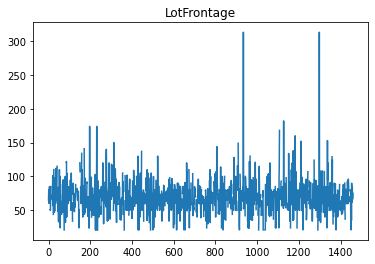

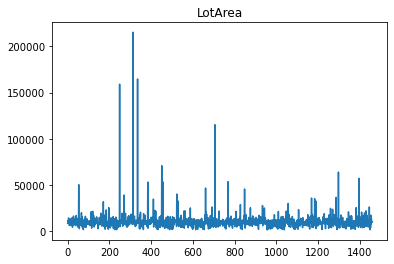

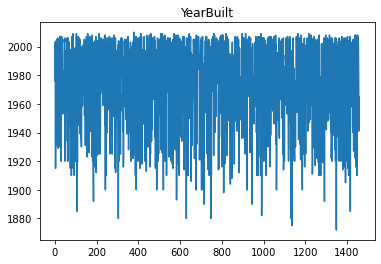

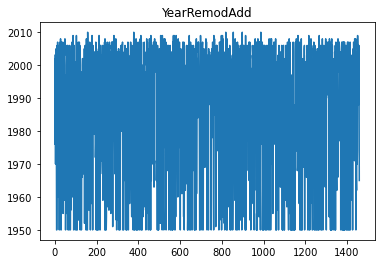

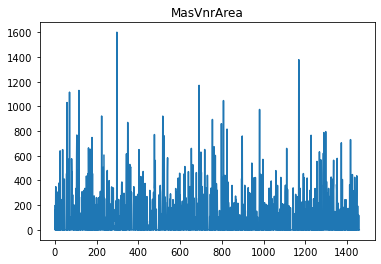

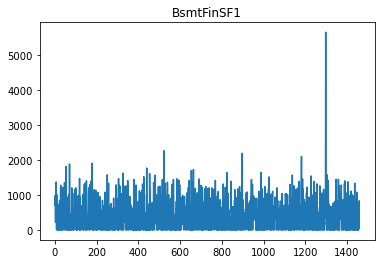

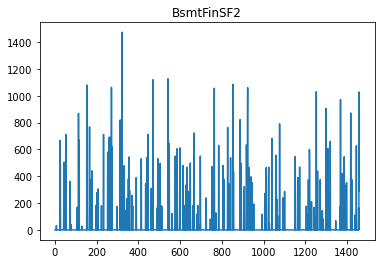

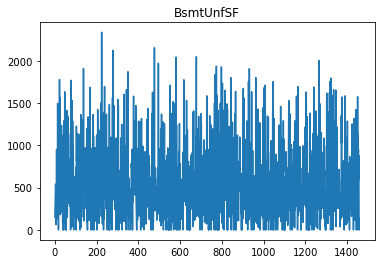

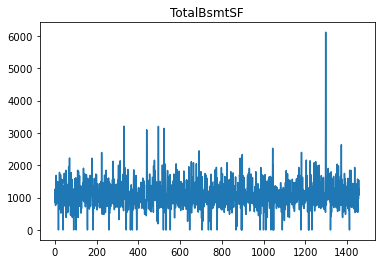

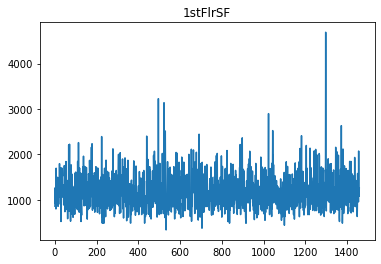

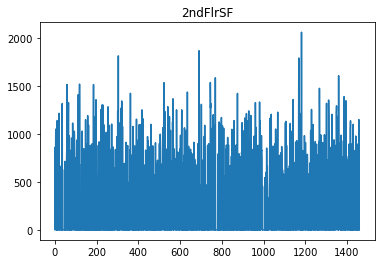

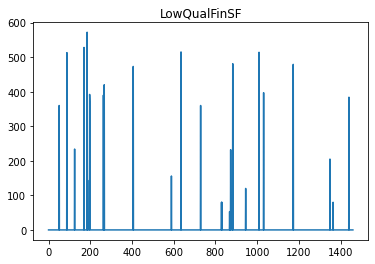

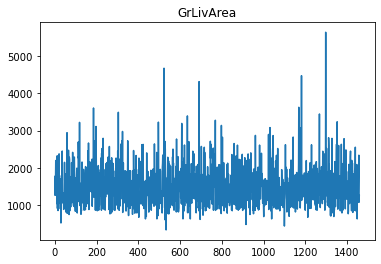

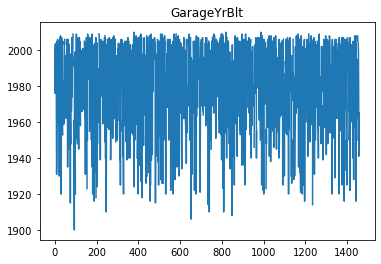

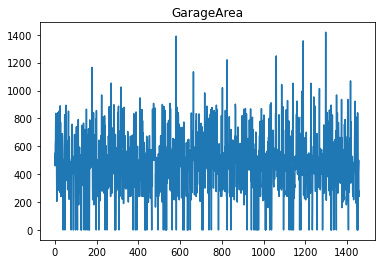

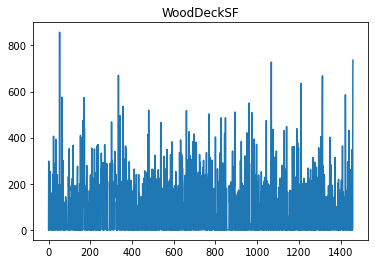

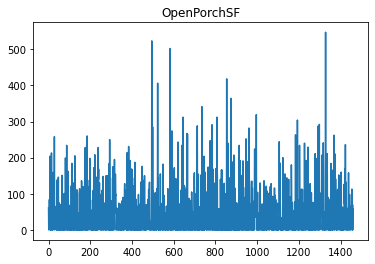

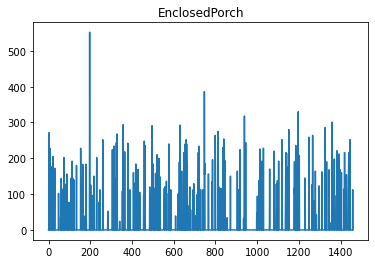

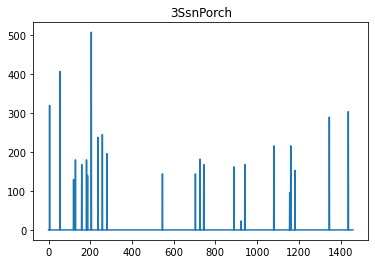

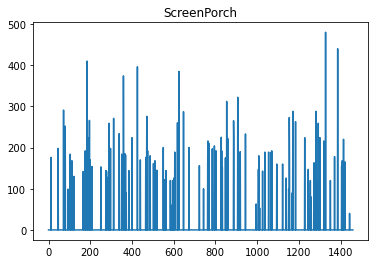

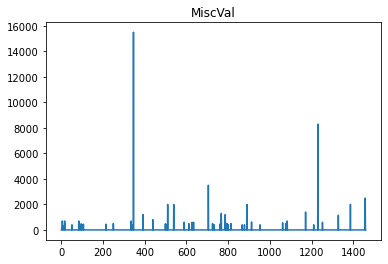

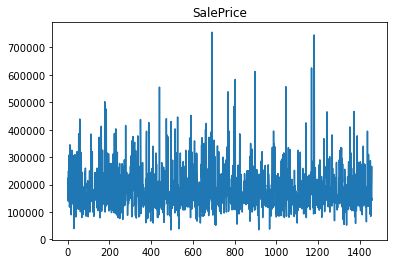

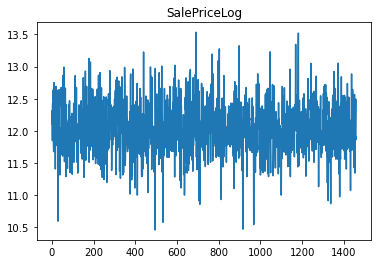

In [62]:
for c in col_types.keys():
    if not col_types[c]:
        print_graph(train ,c)

In [339]:
def shrink_outliers_impl(df, c, threshold=2, stats=None):
    copy_df = deepcopy(df)
    v = df[c].values
    if stats is None:
        mean = np.nanmedian(v)
        std = np.nanstd(v)
    else:
        mean, std = stats
    copy_df[c] = np.clip(v, a_min=mean - threshold * std, a_max=mean + threshold * std)
    return copy_df, (mean, std)

In [340]:
def shrink_outliers(df, stats={}):
    df_ext = df
    for c in col_types.keys():
        if not col_types[c] and c not in TARGETS:
            df_ext, stat = shrink_outliers_impl(df=df_ext, c=c, stats=stats.get(c, None))
            if c not in stats:
                stats[c] = stat
    return df_ext, stats

In [311]:
shrink_outliers(train)[0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.000000,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.000000,61.0,0.000000,0.0,0.0,0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal,208500,12.247699
2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.000000,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.000000,0.0,0.000000,0.0,0.0,0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal,181500,12.109016
3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.000000,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.000000,42.0,0.000000,0.0,0.0,0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal,223500,12.317171
4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.000000,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.000000,35.0,205.248751,0.0,0.0,0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml,140000,11.849405
5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.000000,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.000000,84.0,0.000000,0.0,0.0,0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal,250000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.000000,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,0.000000,40.0,0.000000,0.0,0.0,0,NaN,NaN,NaN,0.000000,8,2007,WD,Normal,175000,12.072547
1457,20,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.000000,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.000000,0.0,0.000000,0.0,0.0,0,NaN,MnPrv,NaN,0.000000,2,2010,WD,Normal,21000

In [313]:
train_without_outliers = remove_outliers(train)

<ipython-input-85-15707bfe3cdf>:7: RuntimeWarning: invalid value encountered in greater
  copy_df[c + '_outliers'] = (np.abs(v - mean) > threshold * std) * (1 - np.isnan(v))


In [110]:
train_without_outliers.shape ,train.shape

((1374, 81), (1460, 81))

In [111]:
train_without_outliers.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


In [154]:
def fill_nan_impl(df, c, f, default=None):
    v = df[c].values
    if default is None:
        default = f(v)
    copy_df = deepcopy(df)
    copy_df[c] = [x if not pd.isnull(x) else default for x in v]
    return copy_df, default

def fill_nan(df, defaults={}):
    from scipy import stats
    df_ext = df
    for c in col_types.keys():
        if c in TARGETS:
            continue
        if not col_types[c]:
            df_ext, d = fill_nan_impl(df_ext, c, default=defaults.get(c, None), f=lambda x: np.nanmean(x))
        else:
            df_ext, d = fill_nan_impl(df_ext, c, default=defaults.get(c, None), f=lambda x: stats.mode(x)[0][0])
        if c not in defaults:
            defaults[c] = d
    return df_ext, defaults

In [156]:
train_without_outliers_nan_filled, defaults = fill_nan(train_without_outliers)

In [158]:
train_without_outliers_nan_filled.shape, train_without_outliers.shape

((1374, 81), (1374, 81))

In [160]:
test_nan_filled = fill_nan(test, defaults)

In [162]:
from sklearn.model_selection import cross_val_score

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal


In [365]:
X = train.drop(['SalePrice', 'SalePriceLog'],axis='columns')
y = train['SalePriceLog'].values.reshape(-1, 1)

In [366]:
from sklearn.model_selection import KFold

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

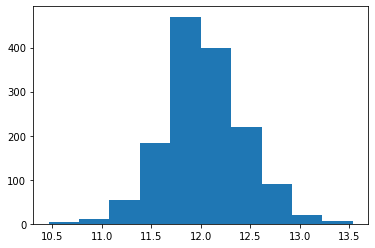

In [367]:
plt.hist(train['SalePriceLog'].values)

In [368]:
def rmse(model, X, y):
    y_pred = model.predict(X)
    y_pred = np.clip(y_pred, a_min=10, a_max=14)
    return np.mean((y_pred - y) ** 2) ** 0.5

In [369]:
class OutliersShrinker:
    def __init__(self):
        self.stats = None

    def fit(self, X, y=None):
        _, self.stats = shrink_outliers(X)
        return self

    def transform(self, X, y=None):
        X_prepared, _ = shrink_outliers(X, self.stats)
        return X_prepared
        

class NanFiller:
    def __init__(self):
        self.defaults = None

    def fit(self, X, y=None):
        _, self.defaults = fill_nan(X)
        return self

    def transform(self, X, y=None):
        X_filled, _ = fill_nan(X, self.defaults)
        return X_filled
    
class OneHotCategTransformer:
    def __init__(self, categ_columns=[c for c in col_types.keys() if col_types[c] and c not in TARGETS]):
        self.ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
        self.categ_columns = categ_columns
    def fit(self, X, y=None):
        self.ohe.fit(X[self.categ_columns])
        return self

    def transform(self, X, y=None):
        X_categ = X[self.categ_columns]
        X_not_categ = X[X.columns.difference(self.categ_columns)].values
        X_categ_ohe_prepared = self.ohe.transform(X_categ)
        X_full_prepared = np.concatenate([X_categ_ohe_prepared, X_not_categ], axis=1)
        return X_full_prepared

In [370]:
from sklearn.pipeline import Pipeline

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

model = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', LinearRegression(normalize=True))
    ]
)

In [420]:
def CV(model):
    cv = KFold(n_splits=10,shuffle=True, random_state=0)
    res = cross_val_score(model, X, y, cv=cv, scoring=rmse)
    print(np.mean(res), np.std(res))

In [421]:
CV(model)

0.31711686653693627 0.07207706062686343


In [373]:
model.fit(X, y)

Pipeline(steps=[('outliers_shrinker',
                 <__main__.OutliersShrinker object at 0x7f82d3f3ca90>),
                ('nan_filler', <__main__.NanFiller object at 0x7f82d3f553a0>),
                ('category_encoder',
                 <__main__.OneHotCategTransformer object at 0x7f82d4461580>),
                ('model', LinearRegression(normalize=True))])

In [398]:
test_predict = np.clip(model.predict(test), a_min=10, a_max=14)

In [412]:
predictions_frame = pd.DataFrame(index=test.index, data=np.exp(test_predict), columns=['SalePrice'])

In [423]:
def fit_predict_and_save(model,X=X, y=y,test=test, file='vanilla_linear_model.csv'):
    model.fit(X, y)
    test_predict = np.clip(model.predict(test), a_min=10, a_max=14)
    predictions_frame = pd.DataFrame(index=test.index, data=np.exp(test_predict), columns=['SalePrice'])
    predictions_frame.to_csv(file, index_label='Id')

In [418]:
from sklearn.linear_model import Lasso, Ridge

In [419]:
model2 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', Ridge(normalize=True, random_state=0))
    ]
)

In [422]:
CV(model2)

0.13169894387043574 0.021918730950138132


In [424]:
fit_predict_and_save(model2, file='default_ridge_reg.csv')

In [425]:
from sklearn.linear_model import Lasso

In [426]:
model3 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', Lasso(normalize=True, random_state=0))
    ]
)

In [427]:
CV(model3)

0.39841124480173984 0.031766720035851306


In [428]:
fit_predict_and_save(model3, file='default_lasso.csv')

In [456]:
from sklearn.linear_model import ElasticNet

model4 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', ElasticNet(normalize=True, random_state=0))
    ]
)
CV(model4)
fit_predict_and_save(model4, file='default_elastic.csv')

0.39841124480173984 0.031766720035851306


In [457]:
from sklearn.linear_model import PoissonRegressor

model5 = Pipeline(
    steps=[
        ('outliers_shrinker', OutliersShrinker()),
        ('nan_filler', NanFiller()),
        ('category_encoder', OneHotCategTransformer()),
        ('model', PoissonRegressor(max_iter=10000))
    ]
)
CV(model5)
fit_predict_and_save(model5, file='poisson_10K_iter.csv')

/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:315: RuntimeWarning: invalid value encountered in add
  dev = 2 

/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:315: RuntimeWarning: invalid value encountered in add
  dev = 2 

0.3984112448017399 0.031766720035851355


/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/olgakadocnikova/opt/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:315: RuntimeWarning: invalid value encountered in add
  dev = 2 

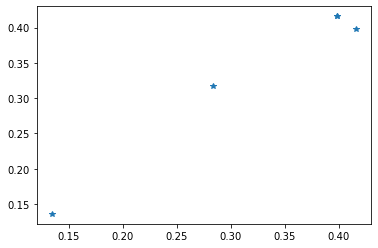

In [458]:
plt.plot([0.283,0.134, 0.416, 0.39841, 0.39841], [0.317, 0.136,0.398, 0.416, 0.416], '*')